# Play Against the Machine

This tutorial is very useful for learning about mutable contexts
https://deepnote.com/@jeh15/Drake-Tutorial-Modeling-Systems-59e84db9-b9b5-42c4-a84f-11763ed115df

In [1]:
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot

from pydrake.all import (StartMeshcat, RigidTransform)

from chess_bot.utils.plotly_utils import multiplot
from chess_bot.stations.game_station import GameStation
from chess_bot.resources.board import Board

In [2]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [3]:
game_station = GameStation(meshcat)


<class 'chess_bot.utils.meshcat_utils.Value'>
Keyboard Controls:
roll : KeyQ / KeyE
pitch : KeyW / KeyS
yaw : KeyA / KeyD
x : KeyJ / KeyL
y : KeyI / KeyK
z : KeyO / KeyU
Press Space to open/close the gripper
Press Escape to stop the simulation


In [4]:
game_station.play_game()

Set pose!
Getting robot move
-----------------------
Robot understanding of board:
RB NB BB    KB BB NB 
PB PB       PB PB PB 
                     
      PB QB          
                     
PW                   
RW PW PW PW PW PW PW 
      BW QW KW BW NW 
-----------------------


Actual move: (0, 0) -> (0, 1)
Predicted move: (0, 0) -> (0, 1)
Robot move: (3, 4) -> (0, 1)


SystemExit: Failure at multibody/plant/tamsi_solver.cc:218 in SolveQuadraticForTheSmallestPositiveRoot(): condition 'Delta > 0' failed.

/opt/homebrew/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3441: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
# game_station.simulator.Initialize()
game_station.run_teleop()

In [ ]:
game_station.make_move((0, 1), (0, 2))
game_station.simulator.AdvanceTo(game_station.simulator.get_context().get_time() + 0.02)

Set pose!


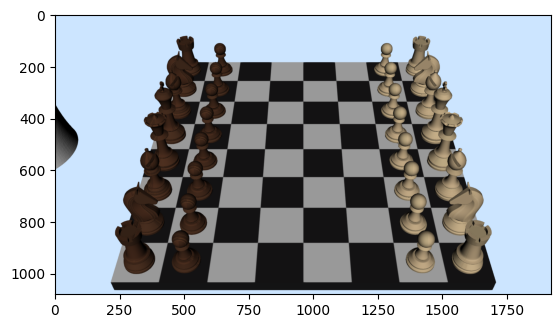

In [ ]:
game_station.show_rgb_image()
# color_image = game_station.station.GetOutputPort("camera_rgb_image").Eval(game_station.station_context)
# color_image = game_station.station.GetOutputPort("camera_rgb_image").Eval(game_station.mut_station_context)
# plt.imshow(color_image.data)

In [6]:
pcds, pieces = game_station.get_processed_pcds() 

In [7]:
fig = multiplot(pcds)
iplot(fig)

In [11]:
# game_station.plant
# plant_context = game_station.plant.CreateDefaultContext()
# game_station.set_arbitrary_board(10)
# game_station.plant.GetMyMutableContextFromRoot(game_station.station_context)

# X_BoardPiece = RigidTransform()
game_station.idx_to_location
# piece = game_station.plant.GetBodyByName("piece_body", indices[0])
# game_station.plant.SetFreeBodyPose(game_station.mut_plant_context, piece, X_BoardPiece)

# game_station.station.Publish(game_station.mut_station_context)

# GetMyMutable
# print(indices)

# Make map of current locations to pieces???

{ModelInstanceIndex(3): 'a1',
 ModelInstanceIndex(4): 'b1',
 ModelInstanceIndex(5): 'c1',
 ModelInstanceIndex(6): 'd1',
 ModelInstanceIndex(7): 'e1',
 ModelInstanceIndex(8): 'f1',
 ModelInstanceIndex(9): 'g1',
 ModelInstanceIndex(10): 'h1',
 ModelInstanceIndex(11): 'a2',
 ModelInstanceIndex(12): 'b2',
 ModelInstanceIndex(13): 'c2',
 ModelInstanceIndex(14): 'd2',
 ModelInstanceIndex(15): 'e2',
 ModelInstanceIndex(16): 'f2',
 ModelInstanceIndex(17): 'g2',
 ModelInstanceIndex(18): 'h2',
 ModelInstanceIndex(19): 'a8',
 ModelInstanceIndex(20): 'b8',
 ModelInstanceIndex(21): 'c8',
 ModelInstanceIndex(22): 'd8',
 ModelInstanceIndex(23): 'e8',
 ModelInstanceIndex(24): 'f8',
 ModelInstanceIndex(25): 'g8',
 ModelInstanceIndex(26): 'h8',
 ModelInstanceIndex(27): 'a7',
 ModelInstanceIndex(28): 'b7',
 ModelInstanceIndex(29): 'c7',
 ModelInstanceIndex(30): 'd7',
 ModelInstanceIndex(31): 'e7',
 ModelInstanceIndex(32): 'f7',
 ModelInstanceIndex(33): 'g7',
 ModelInstanceIndex(34): 'h7'}

In [12]:
a = RigidTransform()
a.translation()

array([0., 0., 0.])

In [21]:
player_start_pos = input('Enter start move as (x, y)')
player_end_pos = input('Enter end move as (x, y)')

player_start_pos = player_start_pos.strip('()')
player_start_pos = tuple([int(i) for i in player_start_pos.split(',')])

player_end_pos = player_end_pos.strip('()')
player_end_pos = tuple([int(i) for i in player_end_pos.split(',')])

In [22]:
player_end_pos

(3, 4)

In [15]:
print(Board.starting_board)

res = [['  ' for i in range(8)] for j in range(8)]
for loc, piece in Board.starting_board.items():
    x_idx, y_idx = Board.location_to_coord(loc)
    res[x_idx][y_idx] = piece

Board.print_board(res)
for row in res:
    print(row)


{'a1': 'RW', 'b1': 'NW', 'c1': 'BW', 'd1': 'QW', 'e1': 'KW', 'f1': 'BW', 'g1': 'NW', 'h1': 'RW', 'a2': 'PW', 'b2': 'PW', 'c2': 'PW', 'd2': 'PW', 'e2': 'PW', 'f2': 'PW', 'g2': 'PW', 'h2': 'PW', 'a8': 'RB', 'b8': 'NB', 'c8': 'BB', 'd8': 'QB', 'e8': 'KB', 'f8': 'BB', 'g8': 'NB', 'h8': 'RB', 'a7': 'PB', 'b7': 'PB', 'c7': 'PB', 'd7': 'PB', 'e7': 'PB', 'f7': 'PB', 'g7': 'PB', 'h7': 'PB'}
RBNBBBQBKBBBNB
PBPBPBPBPBPBPB
              
              
              
              
PWPWPWPWPWPWPW
RWNWBWQWKWBWNW
['RW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'RB']
['NW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'NB']
['BW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'BB']
['QW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'QB']
['KW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'KB']
['BW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'BB']
['NW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'NB']
['RW', 'PW', '  ', '  ', '  ', '  ', 'PB', 'RB']
